In [26]:
!wget https://fmi-unibuc-ia.github.io/ia/Data/data_MNIST.zip

--2020-04-28 11:22:18--  https://fmi-unibuc-ia.github.io/ia/Data/data_MNIST.zip
Resolving fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)... 185.199.111.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629644 (615K) [application/zip]
Saving to: ‘data_MNIST.zip.1’

data_MNIST.zip.1    100%[===================>] 614.89K  --.-KB/s    in 0.07s   

2020-04-28 11:22:18 (8.59 MB/s) - ‘data_MNIST.zip.1’ saved [629644/629644]



In [27]:
!unzip data_MNIST.zip

Archive:  data_MNIST.zip
replace data/test_images.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace data/test_images.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace data/test_images.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/test_images.txt    
  inflating: data/test_labels.txt    
  inflating: data/train_images.txt   
  inflating: data/train_labels.txt   


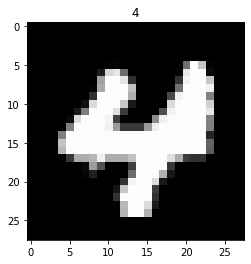

In [28]:
import numpy as np
import matplotlib.pyplot as plt
train_images = np.loadtxt('data/train_images.txt')
train_labels = np.loadtxt('data/train_labels.txt', 'float').astype(np.int)
test_images = np.loadtxt('data/test_images.txt')
test_labels = np.loadtxt('data/test_labels.txt', 'float').astype(np.int)

 # tipul de date int
image = train_images[0, :] # prima imagine
image = np.reshape(image, (28, 28))
plt.title(train_labels[0])
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()

In [0]:
# K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# Diferenta dintre L1  si L2 pentru 5
knn = KNeighborsClassifier(5, metric='l1')
knn.fit(train_images, train_labels)
knn.score(test_images, test_labels)

0.868

In [31]:
knn = KNeighborsClassifier(5, metric='l2')
knn.fit(train_images, train_labels)
knn.score(test_images, test_labels)

0.896

In [32]:
# Diferenta dintre L1  si L2 pentru 3
knn = KNeighborsClassifier(3, metric='l1')
knn.fit(train_images, train_labels)
knn.score(test_images, test_labels)

0.884

In [33]:
knn = KNeighborsClassifier(3, metric='l2')
knn.fit(train_images, train_labels)
knn.score(test_images, test_labels)

0.898

In [34]:
def L1(img, imgs):
    return np.sum(np.abs(img - imgs), axis=1)

def L2(img, imgs):
    return np.sqrt(np.sum(np.power(img - imgs, 2), axis=1))

class KnnClassifier:
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels

    def fit(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels

    def classify_image(self, test_image, num_neighbors=3, metric='l2'):
        # 1. Calculati distanta de la test_image la toate train_images -> [201, 2001, 842, 723, ...] (np.linalg.norm - calculeaza norma L1 sau L2 sau altele)
        if metric == 'l1':
            dists = L1(test_image, self.train_images)
        else:
            dists = L2(test_image, self.train_images)
        # 2. Sortam arrayul de distante crescator pastrand indicii (np.argsort - returneaza indicii in ordinea valorilor sortate)
        indexes = np.argsort(dists)
        # 3. Luam primii num_neighbours din array-ul sortat -> [3, 3, 2]
        k_dists = indexes[:num_neighbors]
        # 4. Numaram clasa dominanta -> 3  (np.bincount - numara cate aparitii de fiecare valoare exista) (np.argmax - returneaza indicele cu valoarea cea mai mare)
        k_classes = self.train_labels[k_dists]
        k_votes = np.bincount(k_classes)
        return np.argmax(k_votes)

    def predict(self, test_images, num_neighbors=3, metric='l2'):
        preds = []
        for test_image in test_images:
            preds.append(self.classify_image(test_image, num_neighbors, metric))
        return preds

    def score(self, test_images, test_labels, num_neighbors=3, metric='l2'):
        preds = self.predict(test_images, num_neighbors, metric)

        return (preds == test_labels).mean()

knn = KnnClassifier(train_images, train_labels)

# 3. Calculați acuratețea metodei celor mai apropiați vecini pe mulțimea de testare
# având ca distanța ‘l2’ și numărul de vecini 3. Salvați predicțiile în fișierul
# predictii_3nn_l2_mnist.txt
knn.score(test_images, test_labels)

0.898

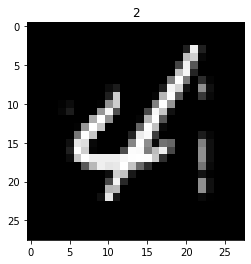

In [35]:
image = test_images[9, :] # prima imagine
image = np.reshape(image, (28, 28))
plt.title(test_labels[0])
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()

In [0]:
# 4. Calculați acuratețea metodei celor mai apropiați vecini pe mulțimea de testare
# având ca distanța L2 și numărul de vecini ∈ [1, 3, 5, 7, 9].

ks = [1, 3, 5, 7, 9]

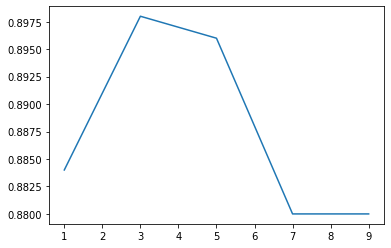

In [37]:
# a) Plotați un grafic cu acuratețea obținuta pentru fiecare vecin 

acc = [knn.score(test_images, test_labels, num_neighbors=x, metric='l2') for x in ks]
plt.plot(ks, acc)
plt.show()

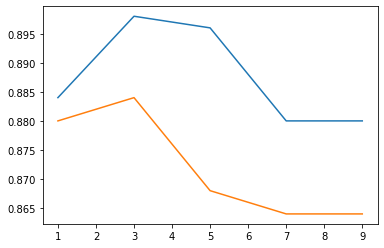

In [38]:
# b) Repetați punctul anterior pentru distanța L1. Plotați graficul de la
# punctul anterior în aceeași figură cu graficul curent 

acc_l1 = [knn.score(test_images, test_labels, num_neighbors=x, metric='l1') for x in ks]
plt.plot(ks, acc)
plt.plot(ks, acc_l1)
plt.show()